In [40]:
pip install pgmpy

     |████████████████████████████████| 327kB 6.5MB/s 


In [1]:
import pandas as pd
from google.colab import drive

## Load Credit Score Data

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df_credit_score = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGM Assignment/german_credit.csv')
df_credit_score.head()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,4,67,male,2,own,NaN,1169,6,radio/TV,good
1,2,22,female,2,own,little,5951,48,radio/TV,bad
2,4,49,male,1,own,little,2096,12,education,good
3,2,45,male,2,free,little,7882,42,furniture/equipment,good
4,3,53,male,2,free,little,4870,24,car,bad


## Exploratory Data Analysis

In [7]:
## Checking Data Types
df_credit_score.dtypes

Credit History      int64
Age                 int64
Gender             object
Job                 int64
Housing            object
Saving accounts    object
Credit amount       int64
Duration            int64
Purpose            object
Risk               object
dtype: object

In [8]:
## Risk is the Label, Checking label values
df_credit_score.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [9]:
## Check credit history values distribution
df_credit_score['Credit History'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Credit History, dtype: int64

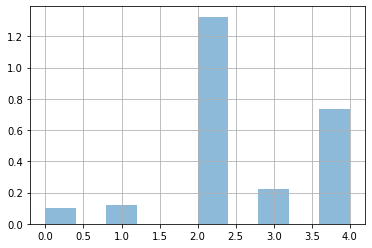

In [10]:
df_credit_score.loc[:, 'Credit History'].hist(alpha=0.5, label='Credit History', density=True)

In [11]:
## Check Age values distribution
df_credit_score['Age'].value_counts()

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64

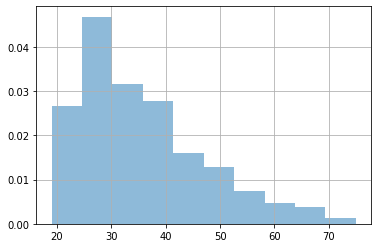

In [12]:
df_credit_score.loc[:, 'Age'].hist(alpha=0.5, label='Age', density=True)

In [13]:
## Check Gender values distribution
df_credit_score['Gender'].value_counts()

male      690
female    310
Name: Gender, dtype: int64

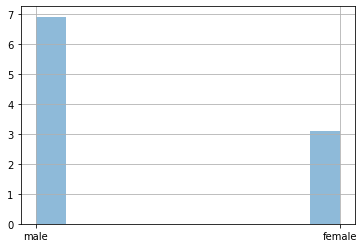

In [14]:
df_credit_score.loc[:, 'Gender'].hist(alpha=0.5, label='Gender', density=True)

In [15]:
## Check Job values distribution
df_credit_score['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

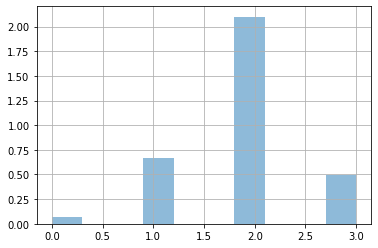

In [16]:
df_credit_score.loc[:, 'Job'].hist(alpha=0.5, label='Job', density=True)

In [17]:
## Check Housing values distribution
df_credit_score['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

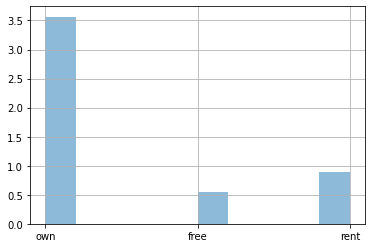

In [18]:
df_credit_score.loc[:, 'Housing'].hist(alpha=0.5, label='Housing', density=True)

In [19]:
## Check Saving accounts values distribution
df_credit_score['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

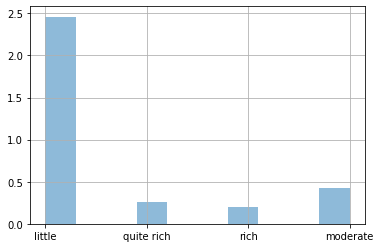

In [20]:
df_credit_score.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Saving accounts', density=True)

In [21]:
## Check Credit amount values distribution
df_credit_score['Credit amount'].value_counts()

1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: Credit amount, Length: 921, dtype: int64

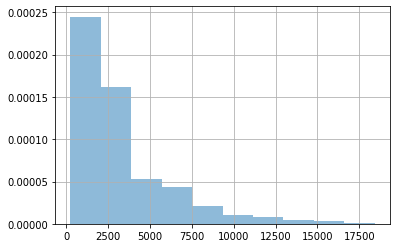

In [22]:
df_credit_score.loc[:, 'Credit amount'].hist(alpha=0.5, label='Credit amount', density=True)

In [23]:
## Check Duration values distribution
df_credit_score['Duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Duration, dtype: int64

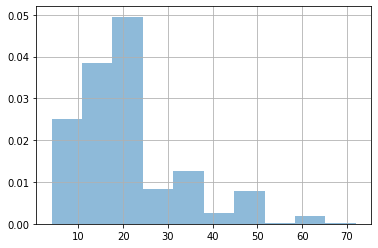

In [24]:
df_credit_score.loc[:, 'Duration'].hist(alpha=0.5, label='Duration', density=True)

In [25]:
## Check Purpose values distribution
df_credit_score['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

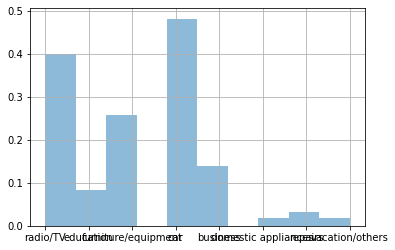

In [26]:
df_credit_score.loc[:, 'Purpose'].hist(alpha=0.5, label='Purpose', density=True)

In [27]:
## Find unique values in the dataset
df_credit_score.nunique()

Credit History       5
Age                 53
Gender               2
Job                  4
Housing              3
Saving accounts      4
Credit amount      921
Duration            33
Purpose              8
Risk                 2
dtype: int64

## Null Value Handling

In [28]:
df_credit_score.isnull().sum()

Credit History       0
Age                  0
Gender               0
Job                  0
Housing              0
Saving accounts    183
Credit amount        0
Duration             0
Purpose              0
Risk                 0
dtype: int64

In [29]:
### replacing NaN with 'nsa'
df_credit_score.loc[df_credit_score['Saving accounts'].isnull(), 'Saving accounts'] = 'nsa'

## Correlation

In [30]:
## Encoding object type columns
from sklearn.preprocessing import LabelEncoder

df_credit_corr = df_credit_score.copy()
df_dtypes = pd.DataFrame((df_credit_corr.dtypes == 'object'), columns = ['obj_type'])
col_list = df_dtypes[(df_dtypes.obj_type == True)].index
le = LabelEncoder()
for feature in col_list:
    df_credit_corr[feature] = le.fit_transform(df_credit_corr[feature])

In [31]:
## Check Correlation
df_credit_corr.corr()

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
Credit History,1.000000,0.147086,0.071802,0.010350,-0.062095,0.041268,-0.059905,-0.077186,0.011442,0.228785
Age,0.147086,1.000000,0.161694,0.015673,-0.301419,0.072511,0.032716,-0.036136,-0.074084,0.091127
Gender,0.071802,0.161694,1.000000,0.070298,-0.219844,0.017073,0.093482,0.081432,-0.063231,0.075493
Job,0.010350,0.015673,0.070298,1.000000,-0.107191,-0.014504,0.285385,0.210910,-0.025326,-0.032735
Housing,-0.062095,-0.301419,-0.219844,-0.107191,1.000000,0.018236,-0.135632,-0.157049,0.020633,-0.019315
Saving accounts,0.041268,0.072511,0.017073,-0.014504,0.018236,1.000000,-0.006495,0.000100,-0.040904,0.181377
Credit amount,-0.059905,0.032716,0.093482,0.285385,-0.135632,-0.006495,1.000000,0.624984,-0.151720,-0.154739
Duration,-0.077186,-0.036136,0.081432,0.210910,-0.157049,0.000100,0.624984,1.000000,-0.083459,-0.214927
Purpose,0.011442,-0.074084,-0.063231,-0.025326,0.020633,-0.040904,-0.151720,-0.083459,1.000000,0.061145
Risk,0.228785,0.091127,0.075493,-0.032735,-0.019315,0.181377,-0.154739,-0.214927,0.061145,1.000000


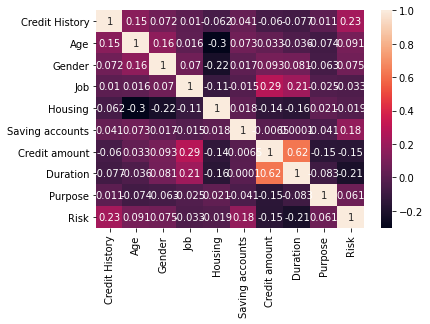

In [32]:
import seaborn as sns

sns.heatmap(df_credit_corr.corr(), annot = True)

### Drop Strongly Correlated Columns

In [33]:
## Strong correlation between Duration and Credit Amount. We may consider to remove "Duration" in feature selection

df_credit_score = df_credit_score.drop(columns = ['Duration'])

## Binning

In [34]:
## From EDA we found that Age and Credit Amount have more than 10 values, we should bin them

min(df_credit_score['Age'].unique()), max(df_credit_score['Age'].unique())

(19, 75)

In [35]:
bin_age = [19, 30, 43, 76]
bin_age_labels = ['19 to 30', '31 to 42', '43 to 75']
df_credit_score['Age'] = pd.cut(df_credit_score['Age'], bin_age, labels= bin_age_labels)
df_credit_score

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Purpose,Risk
0,4,43 to 75,male,2,own,nsa,1169,radio/TV,good
1,2,19 to 30,female,2,own,little,5951,radio/TV,bad
2,4,43 to 75,male,1,own,little,2096,education,good
3,2,43 to 75,male,2,free,little,7882,furniture/equipment,good
4,3,43 to 75,male,2,free,little,4870,car,bad
...,...,...,...,...,...,...,...,...,...
995,2,31 to 42,female,1,own,little,1736,furniture/equipment,good
996,2,31 to 42,male,3,own,little,3857,car,good
997,2,31 to 42,male,2,own,little,804,radio/TV,good
998,2,19 to 30,male,2,free,little,1845,radio/TV,bad


In [36]:
min(df_credit_score['Credit amount'].unique()), max(df_credit_score['Credit amount'].unique())

(250, 18424)

In [37]:
bin_amount = [0, 1501, 3001, 4501, 6001, 18425]
bin_amount_labels = ['0 to 1500', '1501 to 3000', '3001 to 4500', '4501 to 6000', '6001 to 18425']
df_credit_score['Credit amount'] = pd.cut(df_credit_score['Credit amount'], bin_amount, labels= bin_amount_labels)
df_credit_score

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Purpose,Risk
0,4,43 to 75,male,2,own,nsa,0 to 1500,radio/TV,good
1,2,19 to 30,female,2,own,little,4501 to 6000,radio/TV,bad
2,4,43 to 75,male,1,own,little,1501 to 3000,education,good
3,2,43 to 75,male,2,free,little,6001 to 18425,furniture/equipment,good
4,3,43 to 75,male,2,free,little,4501 to 6000,car,bad
...,...,...,...,...,...,...,...,...,...
995,2,31 to 42,female,1,own,little,1501 to 3000,furniture/equipment,good
996,2,31 to 42,male,3,own,little,3001 to 4500,car,good
997,2,31 to 42,male,2,own,little,0 to 1500,radio/TV,good
998,2,19 to 30,male,2,free,little,1501 to 3000,radio/TV,bad


## Split into training & test dataset

In [38]:
from sklearn.model_selection import train_test_split


y = df_credit_score['Risk']
X = df_credit_score.drop(columns = ['Risk'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

print(df_train.shape, df_test.shape)

(900, 9) (100, 9)


## Modelling

In [41]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as pyl
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Bayesian network structure can be obtained by selecting from a wide variety of Bayesian network models. Here we apply the tree augmented Naive Bayes model. The optimum tree is found using the Chow-Liu algorithm. Hill Climb Search is an adaptation of Chow-Liu algorithm, we are using that here.

In [42]:
hc = HillClimbSearch(df_train, scoring_method=BicScore(df_train))

In [43]:
## Select the best model
best_model = hc.estimate()
edges = list(best_model.edges())
model = BayesianModel(edges)

  0%|          | 8/1000000 [00:01<44:31:01,  6.24it/s]


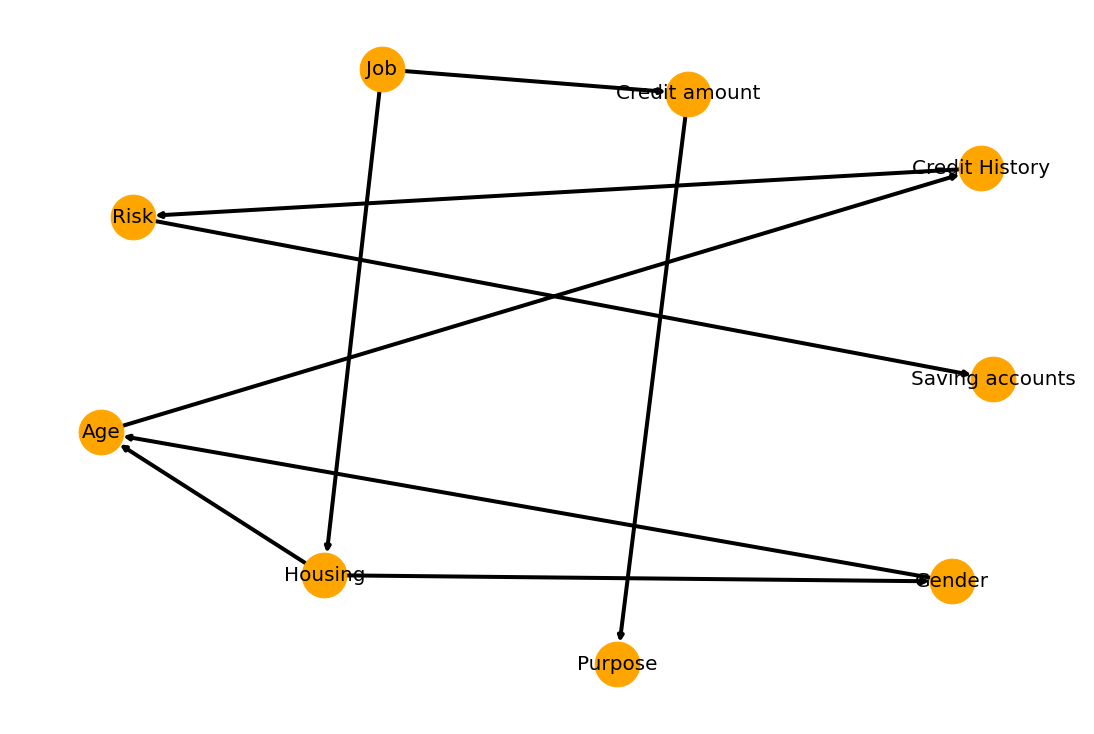

In [44]:
## Plot the model

%matplotlib inline
pyl.figure(figsize=(15,10))

# nx.draw(model, with_labels=True)
nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000, node_color="orange", width = 4, font_size = 20)
pyl.show()

In [45]:
## Fit model using Maximum Likelihood Estimator
model.fit(df_train, estimator=MaximumLikelihoodEstimator)

## Inferences

In [46]:
infer = VariableElimination(model)

#### Find parents of 'Risk'

In [47]:
## Find parents of 'Risk'
model.get_parents('Risk')

['Credit History']

#### Find children of 'Risk'

In [48]:
model.get_children('Risk')

['Saving accounts']

#### Credit History Inferences

In [49]:
df_credit_score['Credit History'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Credit History, dtype: int64

In [50]:
## If Credit history is known, find 'Risk'
## There are 4 values in credit history, 0 to 4
for i in [0,1,2,3,4]:
    print("Credit History:", i)
    print(infer.query(variables=['Risk'], evidence = {'Credit History': i}))

Eliminating: Gender: 100%|██████████| 7/7 [00:00<00:00, 389.53it/s]

Credit History: 0
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.6364 |
+------------+-------------+
| Risk(good) |      0.3636 |
+------------+-------------+
Credit History: 1
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.5854 |
+------------+-------------+
| Risk(good) |      0.4146 |
+------------+-------------+
Credit History: 2
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3216 |
+------------+-------------+
| Risk(good) |      0.6784 |
+------------+-------------+
Credit History: 3
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3418 |
+------------+-------------+
| Risk(good) |      0.6582 |
+------------+-------------+
Credit History: 4



Eliminating: Gender: 100%|██████████| 7/7 [00:00<00:00, 385.78it/s]


+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.1615 |
+------------+-------------+
| Risk(good) |      0.8385 |
+------------+-------------+


#### Saving accounts inferences

In [51]:
df_credit_score['Saving accounts'].value_counts()

little        603
nsa           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [52]:
acc_vals = ['nsa', 'little', 'moderate', 'rich', 'quite rich']
for i in acc_vals:
    print(i)
    print(infer.query(variables=['Risk'], evidence = {'Saving accounts': i}))

  0%|          | 0/7 [00:00<?, ?it/s]

nsa
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.1688 |
+------------+-------------+
| Risk(good) |      0.8313 |
+------------+-------------+
little
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3608 |
+------------+-------------+
| Risk(good) |      0.6392 |
+------------+-------------+
moderate
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.3444 |
+------------+-------------+
| Risk(good) |      0.6556 |
+------------+-------------+
rich


Eliminating: Gender: 100%|██████████| 7/7 [00:00<00:00, 226.10it/s]


+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.1087 |
+------------+-------------+
| Risk(good) |      0.8913 |
+------------+-------------+
quite rich
+------------+-------------+
| Risk       |   phi(Risk) |
+============+=============+
| Risk(bad)  |      0.1786 |
+------------+-------------+
| Risk(good) |      0.8214 |
+------------+-------------+


#### Gender Inference

In [53]:
print(infer.query(variables=['Risk', 'Gender'], joint= True))

Eliminating: Purpose: 100%|██████████| 7/7 [00:00<00:00, 282.06it/s]


+------------+----------------+--------------------+
| Risk       | Gender         |   phi(Risk,Gender) |
+============+================+====================+
| Risk(bad)  | Gender(female) |             0.0958 |
+------------+----------------+--------------------+
| Risk(bad)  | Gender(male)   |             0.2049 |
+------------+----------------+--------------------+
| Risk(good) | Gender(female) |             0.2193 |
+------------+----------------+--------------------+
| Risk(good) | Gender(male)   |             0.4800 |
+------------+----------------+--------------------+


In [54]:
print(infer.query(variables=['Gender'], evidence={'Risk': 'bad'}))
print(infer.query(variables=['Gender'], evidence={'Risk': 'good'}))

Eliminating: Purpose: 100%|██████████| 7/7 [00:00<00:00, 321.98it/s]


+----------------+---------------+
| Gender         |   phi(Gender) |
+================+===============+
| Gender(female) |        0.3186 |
+----------------+---------------+
| Gender(male)   |        0.6814 |
+----------------+---------------+


Eliminating: Purpose: 100%|██████████| 7/7 [00:00<00:00, 383.42it/s]


+----------------+---------------+
| Gender         |   phi(Gender) |
+================+===============+
| Gender(female) |        0.3137 |
+----------------+---------------+
| Gender(male)   |        0.6863 |
+----------------+---------------+


In [55]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore, TreeSearch
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
import networkx as nx
import pylab as pyl
import time

In [56]:
tc = HillClimbSearch(df_train, scoring_method=BicScore(df_train))

In [57]:
## Select the best model
best_model = tc.estimate()
edges = list(best_model.edges())
model = BayesianModel(edges)

  0%|          | 9/1000000 [00:01<38:49:06,  7.16it/s]


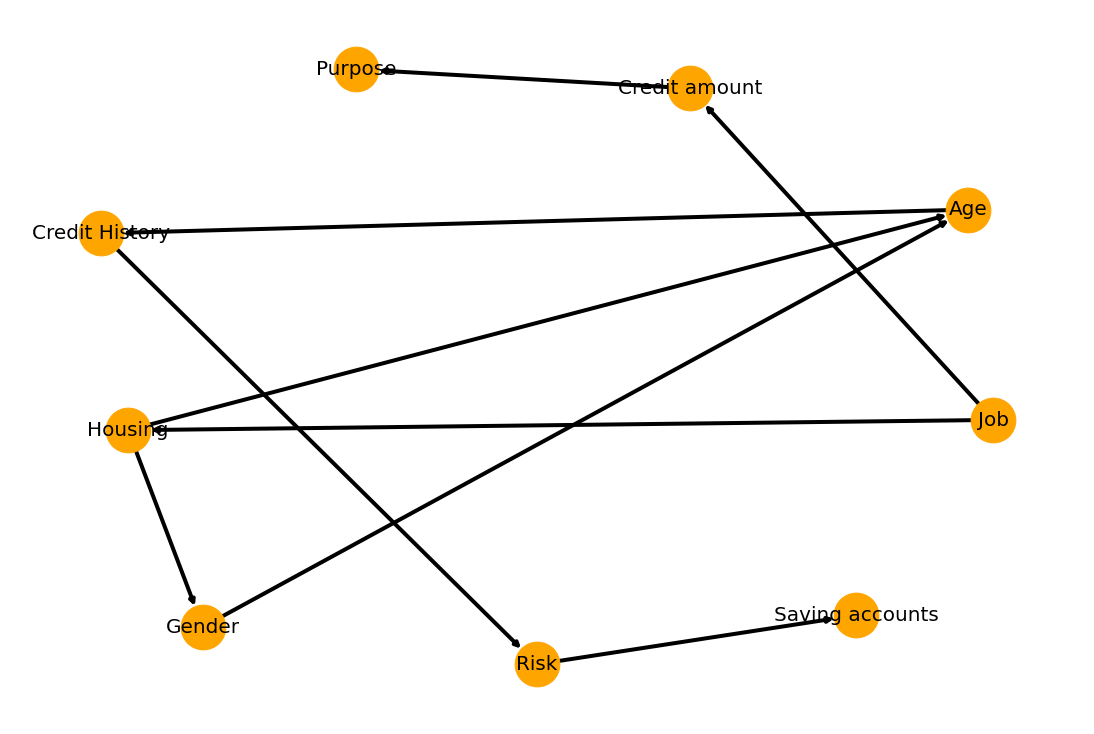

In [58]:
## Plot the model

%matplotlib inline
pyl.figure(figsize=(15,10))

# nx.draw(model, with_labels=True)
nx.draw(model, pos= nx.spring_layout(model), with_labels=True, node_size=2000, node_color="orange", width = 4, font_size = 20)
pyl.show()